In [110]:
import networkx as nx

# Example from dataset

In [111]:
{"PFD":"(raw)(hex){1}(pp)(v)(r)[{bout}(v)(prod)]{tout}(v)(pp)(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1","PID":"(raw)(hex){1}(C){TC}_1(pp)[(C){M}](C){PI}(C){FC}_2(v)<_2(r)[(C){TI}][(C){LC}_3][{bout}(v)<_3(prod)]{tout}(C){PC}_4(v)<_4(pp)[(C){M}<_5](C){PI}(C){FC}_5(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1<_1"}

{'PFD': '(raw)(hex){1}(pp)(v)(r)[{bout}(v)(prod)]{tout}(v)(pp)(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1',
 'PID': '(raw)(hex){1}(C){TC}_1(pp)[(C){M}](C){PI}(C){FC}_2(v)<_2(r)[(C){TI}][(C){LC}_3][{bout}(v)<_3(prod)]{tout}(C){PC}_4(v)<_4(pp)[(C){M}<_5](C){PI}(C){FC}_5(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1<_1'}

## PFD

In [112]:
import networkx as nx
G1 = nx.DiGraph()

In [113]:
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_pfd = Flowsheet()
flowsheet_pfd.state = G1
sfiles_pfd = "(raw)(hex){1}(pp)(v)(r)[{bout}(v)(prod)]{tout}(v)(pp)(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1"
flowsheet_pfd.create_from_sfiles(sfiles_pfd,overwrite_nx=True)

In [114]:
# list_pfd = nx.generate_adjlist(G1)
list_pfd = nx.generate_edgelist(G1)


In [115]:
adj1 = []

for line in list_pfd:
    words = line.strip().split(maxsplit=2)  # split only first two words
    e1,e2 = words[0],words[1]
    adj1.append([e1,e2])

    

In [116]:
len(adj1)
for edge in adj1:
    print(edge)

['raw-1', 'hex-1/1']
['hex-1/1', 'pp-1']
['pp-1', 'v-1']
['v-1', 'r-1']
['r-1', 'v-2']
['r-1', 'v-3']
['v-2', 'prod-1']
['v-3', 'pp-2']
['pp-2', 'prod-2']
['raw-2', 'splt-1']
['splt-1', 'hex-1/2']
['splt-1', 'v-4']
['hex-1/2', 'mix-1']
['mix-1', 'prod-3']
['v-4', 'mix-1']


Number of unit operations = 15
Number of controllers = 0 and Number of transmitters = 0


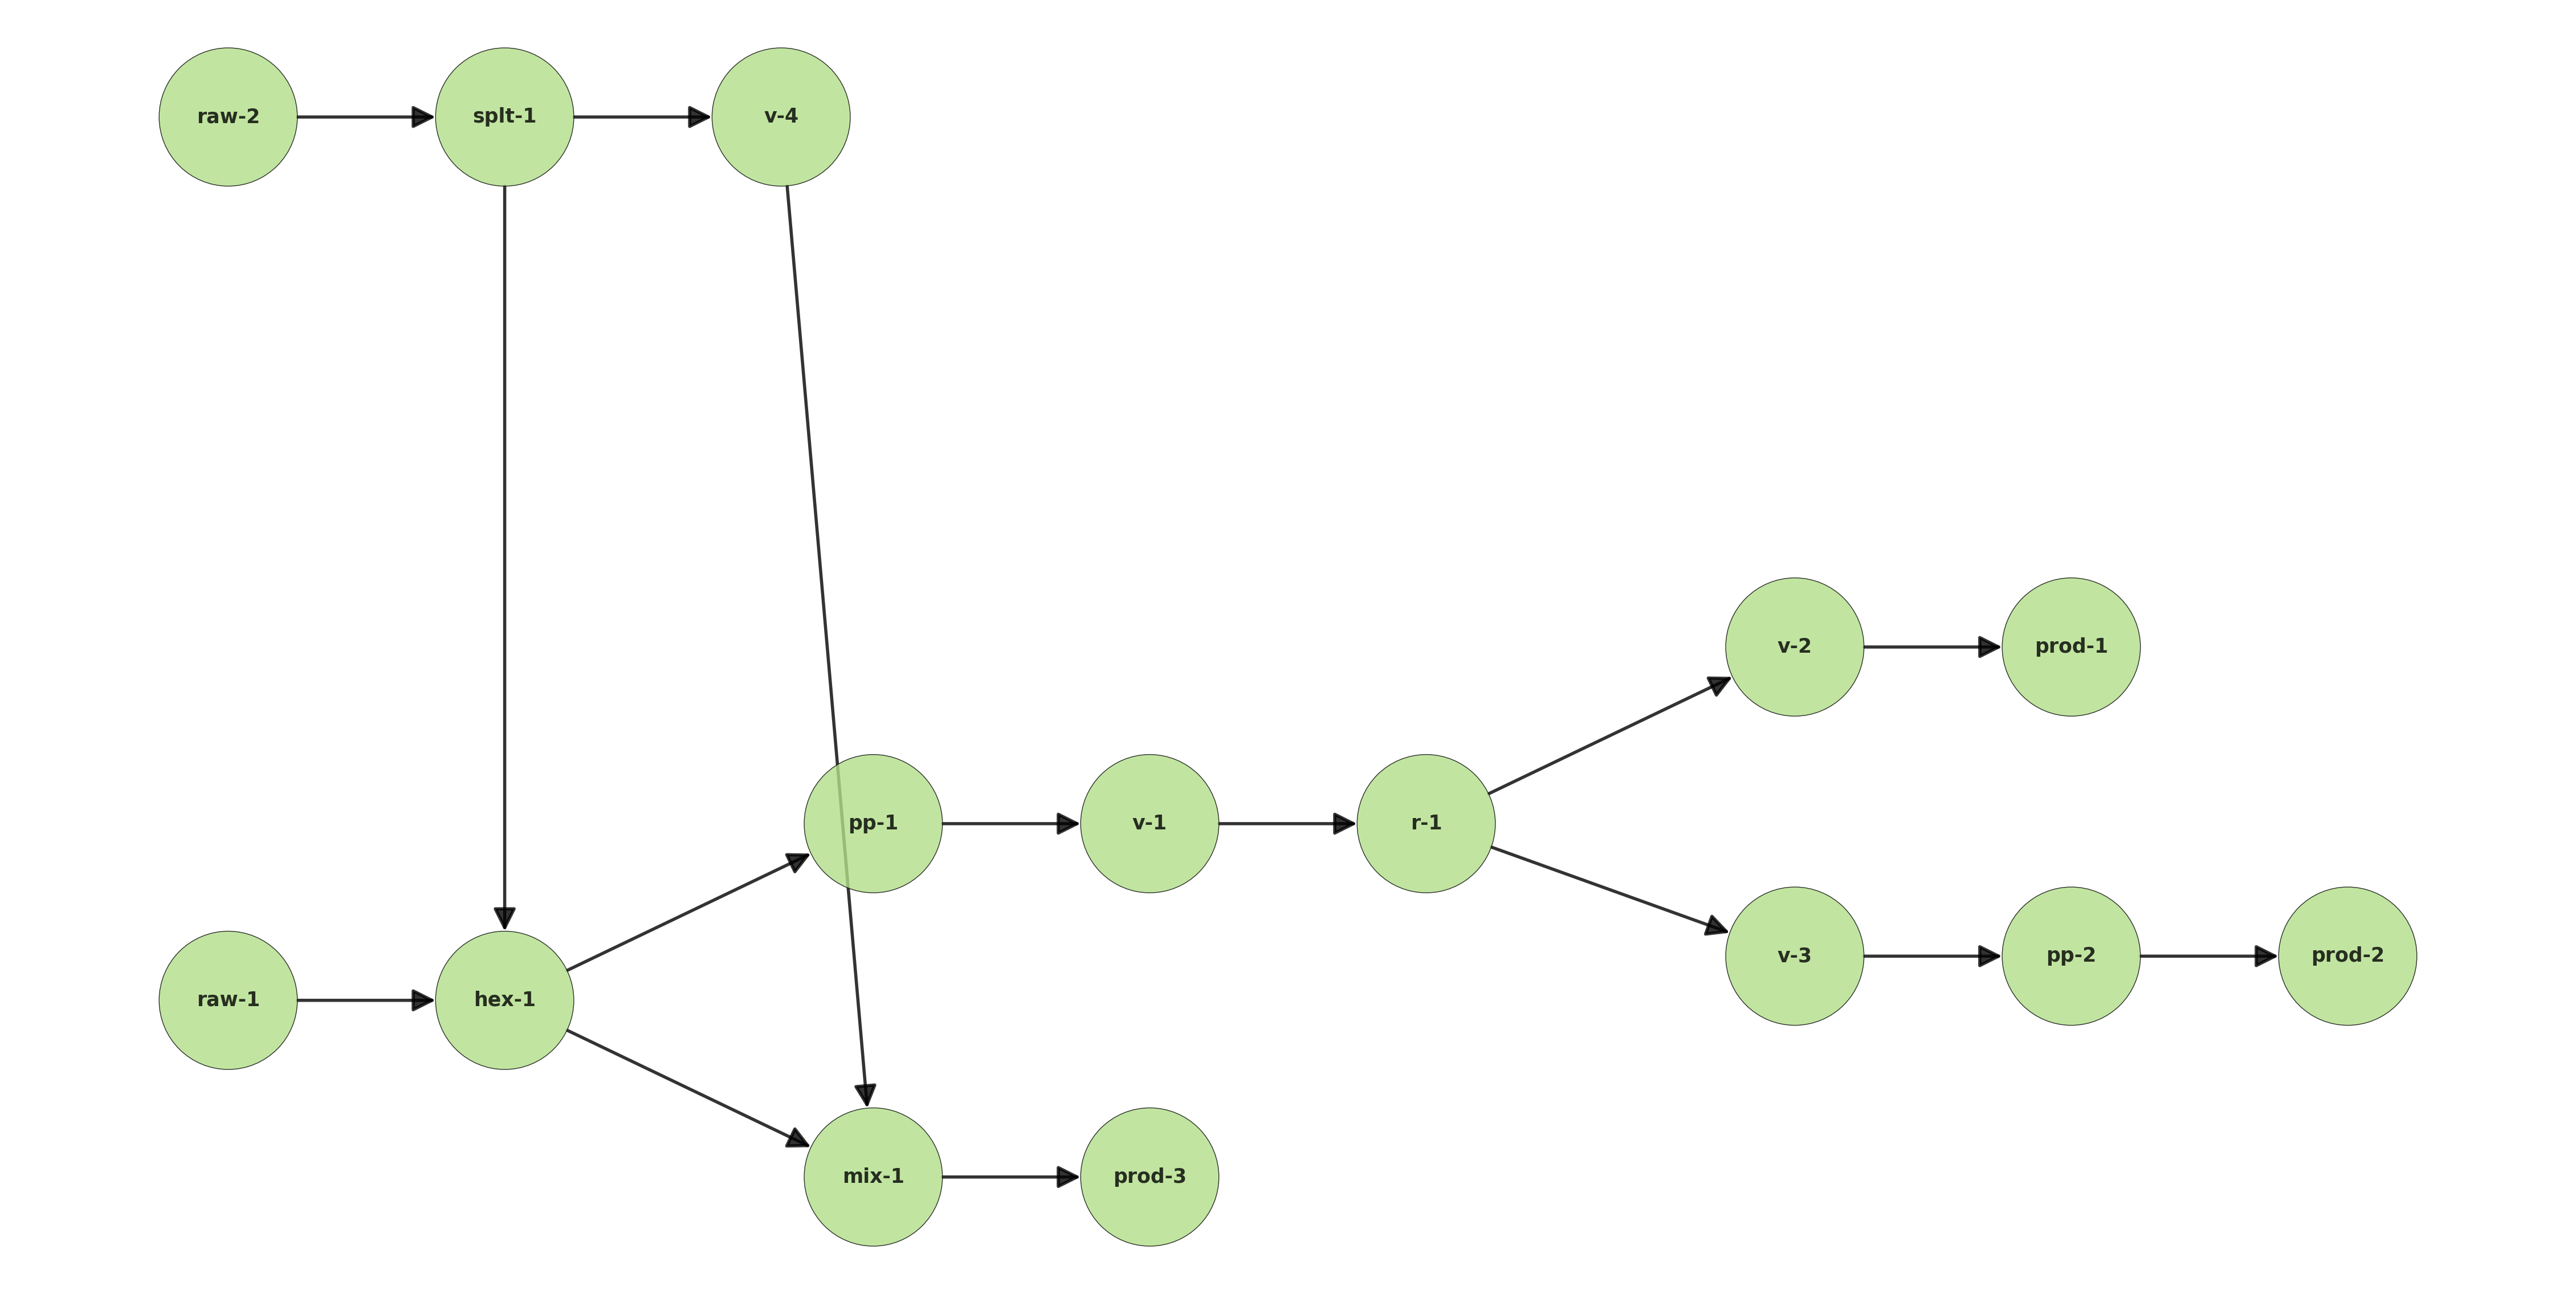

(<Figure size 4500x2250 with 1 Axes>, None, None)

In [117]:
flowsheet_pfd.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False,plot_as_pfd=False)

## PID

In [118]:
import networkx as nx
G2 = nx.DiGraph()

In [119]:
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_pid = Flowsheet()
flowsheet_pid.state = G2
sfiles_pid = "(raw)(hex){1}(C){TC}_1(pp)[(C){M}](C){PI}(C){FC}_2(v)<_2(r)[(C){TI}][(C){LC}_3][{bout}(v)<_3(prod)]{tout}(C){PC}_4(v)<_4(pp)[(C){M}<_5](C){PI}(C){FC}_5(prod)n|(raw)(splt)[(hex){1}(mix)<1(prod)](v)1<_1"
flowsheet_pid.create_from_sfiles(sfiles_pid,overwrite_nx=True)

In [120]:
# list_pid = nx.generate_adjlist(G2)
list_pid = nx.generate_edgelist(G2)


In [121]:
adj2 = []

for line in list_pid:
    words = line.strip().split(maxsplit=2)  # split only first two words
    e1,e2 = words[0],words[1]
    adj2.append([e1,e2])

    

In [122]:
len(adj2)
for edge in adj2:
    print(edge)

['raw-1', 'hex-1/1']
['hex-1/1', 'C-1/TC']
['C-1/TC', 'pp-1']
['C-1/TC', 'v-4']
['pp-1', 'C-2/M']
['pp-1', 'C-3/PI']
['C-3/PI', 'C-4/FC']
['C-4/FC', 'v-1']
['v-1', 'r-1']
['r-1', 'C-5/TI']
['r-1', 'C-6/LC']
['r-1', 'v-2']
['r-1', 'C-7/PC']
['C-6/LC', 'v-2']
['v-2', 'prod-1']
['C-7/PC', 'v-3']
['v-3', 'pp-2']
['pp-2', 'C-8/M']
['pp-2', 'C-9/PI']
['C-9/PI', 'C-10/FC']
['C-10/FC', 'prod-2']
['C-10/FC', 'C-8/M']
['raw-2', 'splt-1']
['splt-1', 'hex-1/2']
['splt-1', 'v-4']
['hex-1/2', 'mix-1']
['mix-1', 'prod-3']
['v-4', 'mix-1']


Number of unit operations = 15
Number of controllers = 7 and Number of transmitters = 3


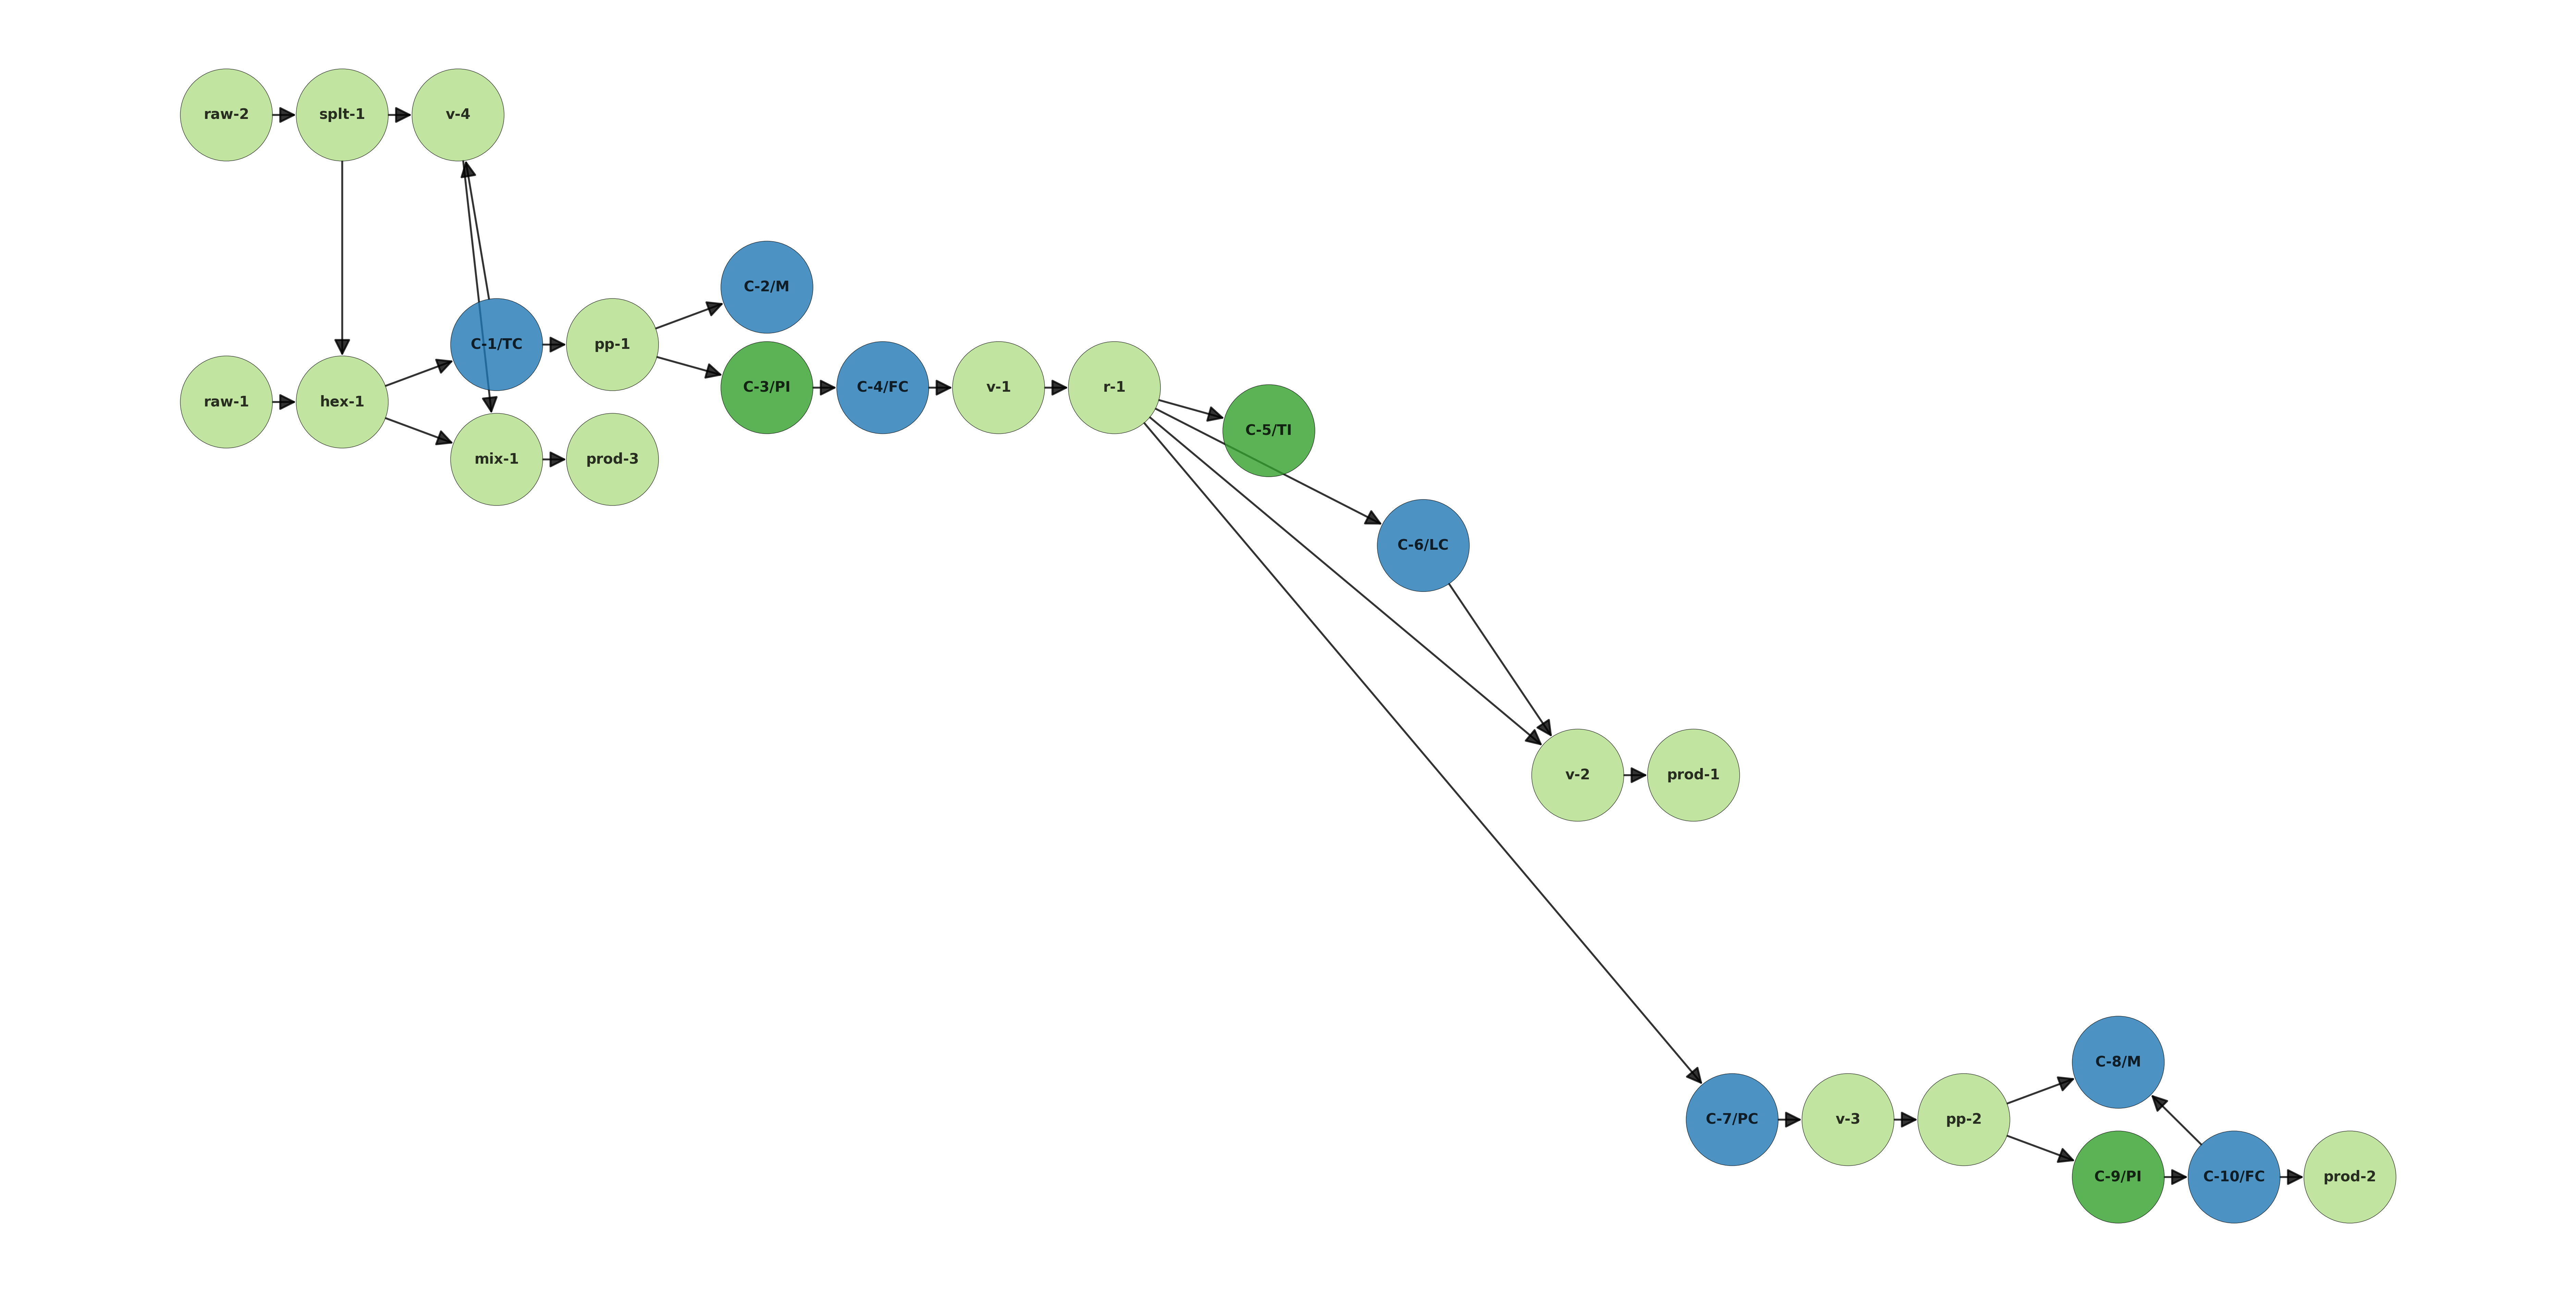

(<Figure size 7500x3750 with 1 Axes>, None, None)

In [123]:
flowsheet_pid.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False,plot_as_pfd=False)

## To compare graph1 is subset of graph2

In [124]:
set1 = set(tuple(x) for x in adj1)
set2 = set(tuple(x) for x in adj2)

is_subset = set1.issubset(set2)
print(is_subset)  


False


In [ ]:
count = 0
not_in_adj2 = []

for edges in adj1:
    if edges not in adj2:
        count += 1
        not_in_adj2.append(edges)

print("Count:", count)
print("Edges not in adj2:", not_in_adj2)

# they may be connected i

Count: 4
Edges not in adj2: [['hex-1/1', 'pp-1'], ['pp-1', 'v-1'], ['r-1', 'v-3'], ['pp-2', 'prod-2']]
